In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Coursework/BikeSharing.csv')

#Inspection of Dataset for Regression

    Who created the Dataset?

        The dataset was created by Gaurav Dutta who is an IT professional with a specialization in Core Banking within the Financial Services Sector.

    How did I get access to the dataset?

        One of the biggest data science platforms, Kaggle, provided me with access to the dataset. Those working in data science and machine learning utilize it.

    Attributes of dataset:

    Features:
        season
        yr
        mnth
        holiday
        weekday
        weathersit
        temp
        atemp
        hum
        windspeed
        casual
        registered

    Target:
        cnt


#Objective of the Dataset

The dataset aims to facilitate the analysis of bike-sharing system usage patterns, optimize bike inventory management, and provide insights for operational planning and service improvement in the bike-sharing industry with the help of data analysis, visualization, and machine learning models.

The dataset is perfect for machine learning beginners, offering hands-on practice in predicting bike rental demand through regression modeling.

#EDA

In [ ]:
#displaying the first five rows of the dataset
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
#displaying the last five rows of the dataset
print("Last 5 rows of the dataset:")
df.tail()

Last 5 rows of the dataset:


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [ ]:
#acquiring the details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


In [ ]:
# shape of the dataset
rows,columns = df.shape
print(f"Number of rows: {rows}, Number of columns: {columns}")

Number of rows: 730, Number of columns: 14


In [ ]:
#columns of the dataset
print("The columns of the dataset")
df.columns

The columns of the dataset


Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [ ]:
#data types
print("Columns and their data types:")
df.dtypes

Columns and their data types:


,0
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64
atemp,float64
hum,float64


In [ ]:
df.describe() #using describe() method to get the statistical summary of the dataframe.

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
df.var() #using var() function to find the variance

,0
season,1.232508e+00
yr,2.503429e-01
mnth,1.190399e+01
holiday,2.797790e-02
weekday,4.024684e+00
workingday,2.166018e-01
weathersit,2.968149e-01
temp,5.635098e+01
atemp,6.642752e+01
hum,2.027089e+02


In [ ]:
col = df.columns.to_list() #extracting column names and storing them in the 'col' list.
col

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [ ]:
#Printing unique values for the first 7 columns
for c in col[:7]:
  print(f"{c} has values {list(df[c].unique())}")

season has values [1, 2, 3, 4]
yr has values [0, 1]
mnth has values [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
holiday has values [0, 1]
weekday has values [6, 0, 1, 2, 3, 4, 5]
workingday has values [0, 1]
weathersit has values [2, 1, 3]


In [ ]:
#dropping unnecessary column, dropping 'workingday' as it can be represented by holiday
df.drop(columns='workingday', axis = 1, inplace = True)

In [ ]:
col = df.columns.to_list() #extracting column names to a list

#separating categorical columns and descriptive columns
cat_cols = col[:6]
desc_cols = col[6:]

col

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

#Data Cleaning

In [ ]:
#Missing Values
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
weathersit,0
temp,0
atemp,0
hum,0
windspeed,0


In [ ]:
#Filling missing values in specific columns with their respective mean values
df['temp'] = df['temp'].fillna(df['temp'].mean())
df['atemp'] = df['atemp'].fillna(df['atemp'].mean())
df['hum'] = df['hum'].fillna(df['hum'].mean())
df['windspeed'] = df['windspeed'].fillna(df['windspeed'].mean())
df['casual'] = df['casual'].fillna(df['casual'].mean())
df['registered'] = df['registered'].fillna(df['registered'].mean())
df['cnt'] = df['cnt'].fillna(df['cnt'].mean())


In [ ]:
#filling missing values in categorical columns with their respective mode values
df['season'] = df['season'].fillna(df['season'].mode()[0])
df['yr'] = df['yr'].fillna(df['yr'].mode()[0])
df['mnth'] = df['mnth'].fillna(df['mnth'].mode()[0])
df['holiday'] = df['holiday'].fillna(df['holiday'].mode()[0])
df['weekday'] = df['weekday'].fillna(df['weekday'].mode()[0])
df['weathersit'] = df['weathersit'].fillna(df['weathersit'].mode()[0])

In [ ]:
#dropping atemp due ot high correlation with temp
df.drop(['atemp'], axis = 1, inplace = True)
df

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,2,14.110847,80.5833,10.749882,331,654,985
1,1,0,1,0,0,2,14.902598,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,8.200000,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,9.305237,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,2,10.420847,65.2917,23.458911,247,1867,2114
726,1,1,12,0,5,2,10.386653,59.0000,10.416557,644,2451,3095
727,1,1,12,0,6,2,10.386653,75.2917,8.333661,159,1182,1341
728,1,1,12,0,0,1,10.489153,48.3333,23.500518,364,1432,1796


In [ ]:
desc_cols.remove('atemp') #removing 'atemp' from the list of descriotive columns
desc_cols

['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [ ]:
#scale the latter features of the dataset
scaler = StandardScaler()
df[desc_cols] = scaler.fit_transform(df[desc_cols])

In [ ]:
#one hot encode the categorical value
df = pd.get_dummies(df, columns =  cat_cols)
df.head()

,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,season_4,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,-0.827613,1.252343,-0.387833,-0.755455,-1.927745,-1.820972,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,-0.722069,0.480996,0.748899,-1.046996,-1.917480,-1.916078,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,-1.635432,-1.338073,0.745931,-1.063031,-1.558846,-1.632827,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,-1.615560,-0.261577,-0.389769,-1.080523,-1.414494,-1.522732,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4,-1.468226,-1.340294,-0.046477,-1.118424,-1.373434,-1.503090,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False


In [ ]:
df.isnull().sum().sum() #using another null function to count the total number of missing values in the entire dataframe

0

In [ ]:
#using the duplicated() to check for duplicate rows in the dataframe
print("Number of duplicate rows: ", df.duplicated().sum())

Number of duplicate rows:  0


In [ ]:
df.shape #getting the dimensions (number of rows and columns)

(730, 36)

#Data Visulaization

In [ ]:
df

,temp,hum,windspeed,casual,registered,season_1,season_2,season_3,season_4,yr_0,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,-0.827613,1.252343,-0.387833,-0.755455,-1.927745,True,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,-0.722069,0.480996,0.748899,-1.046996,-1.917480,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
2,-1.635432,-1.338073,0.745931,-1.063031,-1.558846,True,False,False,False,True,...,False,True,False,False,False,False,False,True,False,False
3,-1.615560,-0.261577,-0.389769,-1.080523,-1.414494,True,False,False,False,True,...,False,False,True,False,False,False,False,True,False,False
4,-1.468226,-1.340294,-0.046477,-1.118424,-1.373434,True,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,-1.319509,0.177576,2.059845,-0.877902,-1.149528,True,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
726,-1.324068,-0.264634,-0.452029,-0.299193,-0.774854,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
727,-1.324068,0.880424,-0.853182,-1.006180,-1.588999,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
728,-1.310404,-1.014341,2.067858,-0.707351,-1.428608,True,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False


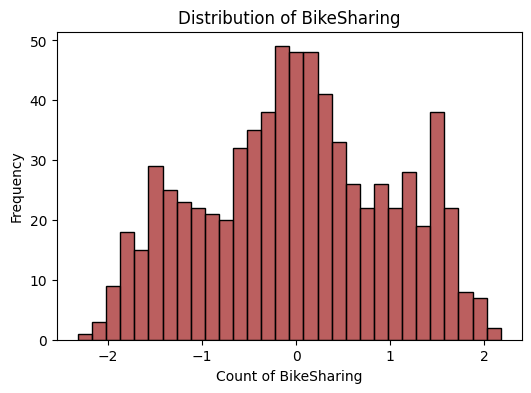

In [ ]:
df
cnt_dt = df['cnt'] #extracting the 'cnt' column for univariate analysis

#creating a histogram for the distribution of bikesharing
#Univariate Analysis, Bar Plot
plt.figure(figsize = (6, 4))
sns.histplot(cnt_dt, bins=30, kde = False, color = 'brown')
plt.title('Distribution of BikeSharing')
plt.xlabel('Count of BikeSharing')
plt.ylabel('Frequency')
plt.show()

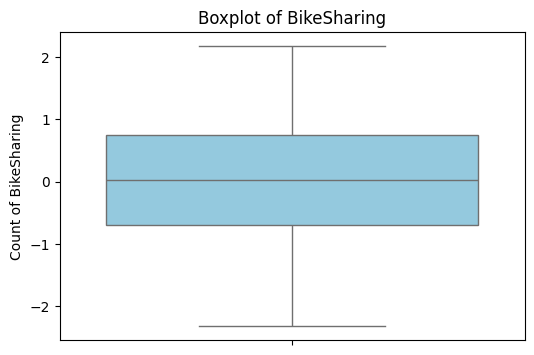

In [ ]:
#Univariate Analysis, Box plot
plt.figure(figsize=(6, 4))
sns.boxplot(y=cnt_dt, color = "skyblue")
plt.title("Boxplot of BikeSharing")
plt.ylabel("Count of BikeSharing")
plt.show()

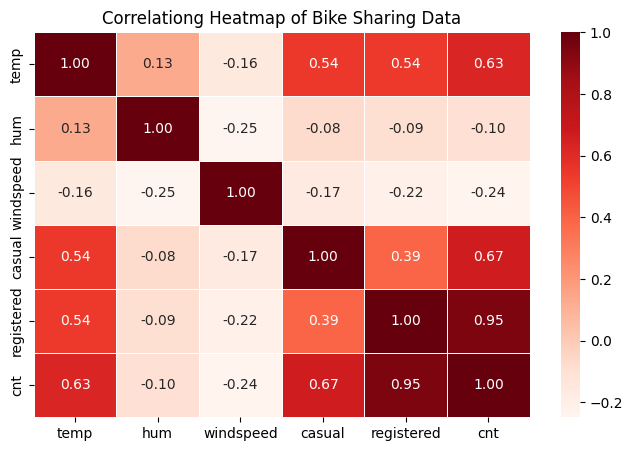

In [ ]:
# Bivariate Analysis, Correlation Heatmap
#creating a correlation matrix
cormat = df[['temp',	'hum',	'windspeed',	'casual',	'registered', 'cnt']].corr()

#Plotting a heatmap for the correlation matrix
plt.figure(figsize=(8,5))
sns.heatmap(cormat, cmap = 'Reds', annot = True, fmt='.2f', linewidths = 0.4)
plt.title("Correlationg Heatmap of Bike Sharing Data")
plt.show()

In [ ]:
#assigning the dataframe `df` to a new variable `X`
X = df
X.head() #displaying the first five rows of a Dataframe

,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,season_4,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,-0.827613,1.252343,-0.387833,-0.755455,-1.927745,-1.820972,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,-0.722069,0.480996,0.748899,-1.046996,-1.917480,-1.916078,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,-1.635432,-1.338073,0.745931,-1.063031,-1.558846,-1.632827,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,-1.615560,-0.261577,-0.389769,-1.080523,-1.414494,-1.522732,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4,-1.468226,-1.340294,-0.046477,-1.118424,-1.373434,-1.503090,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False


In [ ]:
y = df.pop('cnt') #extracting and removing the 'cnt' column from the dataframe and assigning it to variable 'y'

#Train-test-split

In [ ]:
#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


#Linear-Regression

In [ ]:
#creating a linear regression model
lin_model = LinearRegression()

In [ ]:
#fitting the linear regression model on the training data
lin_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#predicting the target variable on the training set using the trained linear regression model
y_pred_train = lin_model.predict(X_train)

In [ ]:
# predicting the target variable on the testing set using the trained linear regression model
y_pred_test = lin_model.predict(X_test)

In [ ]:
#calculating and printing the Mean Squared Error (MSE) for training and testing sets
print("MSE in training", mean_squared_error(y_train, y_pred_train))
print("MSE in testing", mean_squared_error(y_test, y_pred_test))

MSE in training 3.6351708488728144e-31
MSE in testing 3.633287841178744e-31


In [ ]:
#calculating and printing the r2 score for training and testing sets
print("R2 score in training", r2_score(y_train, y_pred_train))
print("R2 score in testing", r2_score(y_test, y_pred_test))

R2 score in training 1.0
R2 score in testing 1.0


In [ ]:
print("\nLinear Regression Model (sklearn):")
print(f"MAE: {mae_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")
print(f"R2: {r2_lr:.4f}")


Linear Regression Model (sklearn):
MAE: 0.0000
RMSE: 0.0000
R2: 1.0000


#Support Vector Machine (Regression)

In [ ]:
#creating and fitting a support vector machine (SVM) regression model
svm_model = SVR().fit(X_train, y_train)

In [ ]:
#predicting the target variable on the training set uisng the trained Support Vector Machine(SVM) regression model
y_pred_train = svm_model.predict(X_train)

In [ ]:
#predicting the target variable on the testing set uisng the trained Support Vector Machine(SVM) regression model
y_pred_test = svm_model.predict(X_test)

In [ ]:
#calculating and printing the MSE for training and testing sets using SVM regression model
print("MSE in training", mean_squared_error(y_train, y_pred_train))
print("MSE in testing", mean_squared_error(y_test, y_pred_test))

MSE in training 0.005482009051193816
MSE in testing 0.011332915614589293


In [ ]:
#calculating and printing the R2 score for training and testing sets using SVM regression model
print("R2 score in training", r2_score(y_train, y_pred_train))
print("R2 score in testing", r2_score(y_test, y_pred_test))

R2 score in training 0.9946224187823739
R2 score in testing 0.9876070297708683


According to these metrics, the Linear Regression model performs better on training and testing data than the SVM model. This conclusion is supported by the Linear Regression model's lower MSE values and higher R2 scores, which demonstrate enhanced prediction power and a better fit to the data. The Linear Regression model is believed to be the best-performing model for this dataset.

#Hyper-parameter Tuning

#Linear Regression Model

In [ ]:
#Dictionary of hyperparameters to be tested for the LinearRegression model
linear_param = {'fit_intercept': [True, False],
                     'copy_X': [True, False],
                     'positive': [True, False]}

In [ ]:
#creating an instance of GridSearchCV for hyperpara,eter tuning of a LinearRegression model.
lin_Model_Tuned = GridSearchCV(LinearRegression(), linear_param)

In [ ]:
#Training the model using the GridSearchCV instamce tp find optimal hyperparameters
lin_Model_Tuned.fit(X_train, y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]})

In [ ]:
lin_Model_Tuned.best_params_ #Accessing the best hyperparameter values found by the GridSearchCV for the LinearRegression model

{'copy_X': True, 'fit_intercept': True, 'positive': True}

In [ ]:
#making predictions on the training and testing data using the tuned LinearRegression model
y_pred_train = lin_Model_Tuned.predict(X_train)
y_pred_test = lin_Model_Tuned.predict(X_test)

In [ ]:
#printing the mse for the training and testing data using the tuned LinearRegression model
print("MSE(Training):", mean_squared_error(y_train, y_pred_train))
print("MSE(Testing)", mean_squared_error(y_test, y_pred_test))

MSE(Training): 3.1671319838286464e-31
MSE(Testing) 2.854020598161658e-31


In [ ]:
#printing the r2 score for the training and testing data using the tuned LinearRegression model
print("R2 Score(Training):", r2_score(y_train, y_pred_train))
print("R2 Score(Testing):", r2_score(y_test, y_pred_test))

R2 Score(Training): 1.0
R2 Score(Testing): 1.0


##Support vector machine(svm) regression

In [ ]:
#creating an instance of GridSearchCV or hyperparameter tuning of a SVR model with specified parameters
support_params ={'C': [0.1, 1],
                     'kernel': ['rbf', 'linear']
                     }
svr_Model_Tuned = GridSearchCV(SVR(), support_params, n_jobs = -1, verbose = 2, cv = 3)

In [ ]:
svr_Model_Tuned.fit(X_train, y_train) #traiusingning the SVR model  the GridSearchCV instance to find optimal hyperparameters

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1], 'kernel': ['rbf', 'linear']},
             verbose=2)

In [ ]:
svr_Model_Tuned.best_params_ #accessing the best hyperparameter values found by the GridSearchCV for the SVR model.

{'C': 1, 'kernel': 'linear'}

In [ ]:
#making predictions on the training and test data using the tuned SVR model
y_pred_train = svr_Model_Tuned.predict(X_train)
y_pred_test = svr_Model_Tuned.predict(X_test)

In [ ]:
#printing the mse for the training and testing using the tuned SVR model
print("MSE(Training):", mean_squared_error(y_train, y_pred_train))
print("MSE(Testing)", mean_squared_error(y_test, y_pred_test))

MSE(Training): 0.0021263093211323554
MSE(Testing) 0.0017632694066958485


In [ ]:
#printing the r2 score for the training and testing data using the tuned SVR model
print("R2 Score(Training Data):", r2_score(y_train, y_pred_train))
print("R2 Score(Testing Data):", r2_score(y_test, y_pred_test))

R2 Score(Training Data): 0.9979141951497336
R2 Score(Testing Data): 0.9980717984668491


#Feature Selection

#Sequential Feature Selection

In [ ]:
#creating a new instance of a linear regression model wiht specific parameters
lr_Model_Tuned = LinearRegression(copy_X = True, fit_intercept = True, positive = False, n_jobs = None)

In [ ]:
#creating a Sequential Feature Selector object with the tuned Linear Regression model, selecting 5 features direction
sequential_featureSelector = SequentialFeatureSelector(lr_Model_Tuned, n_features_to_select = 5, direction='forward')

In [ ]:
#using sequential feature selector to perform feature selection
sequential_featureSelector.fit(X, y)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5)

In [ ]:
#getting the selected features from sequential feature selector
sequential_conn = sequential_featureSelector.get_support()

In [ ]:
#creating a new subset of data with selected features from sequential feature selector (forward)
X_selected_features_forward = X[X.columns[sequential_conn]]
X_selected_features_forward.head()

,temp,hum,windspeed,casual,registered
0,-0.827613,1.252343,-0.387833,-0.755455,-1.927745
1,-0.722069,0.480996,0.748899,-1.046996,-1.917480
2,-1.635432,-1.338073,0.745931,-1.063031,-1.558846
3,-1.615560,-0.261577,-0.389769,-1.080523,-1.414494
4,-1.468226,-1.340294,-0.046477,-1.118424,-1.373434


In [ ]:
#using sequential feature selector with backward direction to refine the linear regression model
sequential_featureSelector = SequentialFeatureSelector(lr_Model_Tuned, n_features_to_select = 5, direction = 'backward')

In [ ]:
#fitting the sequential feature selector to perform backward feature selection
sequential_featureSelector.fit(X, y)

SequentialFeatureSelector(direction='backward', estimator=LinearRegression(),
                          n_features_to_select=5)

In [ ]:
#getting the selected features from sequential feature selector
sequential_conn = sequential_featureSelector.get_support()

In [ ]:
#creating a new subset of data with selected featues from sequential feature selector (backward)
X_selected_features_backward = X[X.columns[sequential_conn]]
X_selected_features_backward.head()

,casual,registered,weathersit_1,weathersit_2,weathersit_3
0,-0.755455,-1.927745,False,True,False
1,-1.046996,-1.917480,False,True,False
2,-1.063031,-1.558846,True,False,False
3,-1.080523,-1.414494,True,False,False
4,-1.118424,-1.373434,True,False,False


#####Checking Accuracy of Sequential Forward Selection.

In [ ]:
#creating a new subset of data with selected features from sequential feature selector(backward)
X_train, X_test, y_train, y_test = train_test_split(X_selected_features_backward, y, test_size = 0.2)

In [ ]:
#creating a linear regression model with specified parameters
lr_Model = LinearRegression(copy_X = True, fit_intercept = True, positive = False, n_jobs = None)

In [ ]:
#training the linear regression model on the training set
lr_Model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#making predictions on the traiing and test sets using the trained linear regressin model
y_train_pred = lr_Model.predict(X_train)
y_test_pred = lr_Model.predict(X_test)

In [ ]:
#evaluating the linear regression model using mse
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

4.570138995826535e-31
4.711585491546213e-31


In [ ]:
#evaluating the linear regression model using r2 score
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

1.0
1.0


In [ ]:
#creating and fitting an SVR model with a linear kernel
svr_Model = SVR(C = 1, kernel = 'linear')
svr_Model.fit(X_train, y_train)

SVR(C=1, kernel='linear')

In [ ]:
y_train_pred = svr_Model.predict(X_train)
y_test_pred = svr_Model.predict(X_test)

In [ ]:
#evaluating the SVR model using r2 score on training and testing sets
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.9976328150048047
0.9975746685433503


#Checking Accuracy of Sequesntial Backward Selection

In [ ]:
#test_size = 0.2: reserve 20% of the data for testing, while 80% will be used for training
X_train, X_test, y_train, y_test = train_test_split(X_selected_features_backward, y, test_size = 0.2)

In [ ]:
#creating a linear regression model with specified parameters
lr_Model = LinearRegression(copy_X = True, fit_intercept = True, positive = False, n_jobs = None)

In [ ]:
lr_Model.fit(X_train, y_train) #fitting the linear regression model to the training data

LinearRegression()

In [ ]:
# Train the model using the training datasets
# and make predictions on the training dataset
y_train_pred = lr_Model.predict(X_train)

# Make predictions on the test dataset
y_test_pred = lr_Model.predict(X_test)

In [ ]:
#printing r2 score for train and test data
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

1.0
1.0


In [ ]:
#creating and fitting an SVR model with  a linear kernel
svr_Model = SVR(C = 1, kernel = 'linear')
svr_Model.fit(X_train, y_train)

SVR(C=1, kernel='linear')

In [ ]:
#making predictions on the training and test sets using the trained SVR model
y_train_pred = svr_Model.predict(X_train)
y_test_pred = svr_Model.predict(X_test)

In [ ]:
#evaluating the SVR model using R2 score on training and test sets
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.9976210329663431
0.9976534302967582


#Final Model

###Train, Test, Split for Final Model

In [ ]:
#splitting the dataset into training and testing sets(80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected_features_backward, y, test_size = 0.2)


In [ ]:
#creating a linear regression model with specified parameters
lr_Model= LinearRegression(copy_X = True, fit_intercept = True, positive = False, n_jobs = None)

In [ ]:
#training the linear regression model on the training set
lr_Model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#making predictions on the training and test sets using the trained linear regression model
y_train_pred = lr_Model.predict(X_train)
y_test_pred = lr_Model.predict(X_test)

In [ ]:
#evaluating the linear regression model using mse on training and test sets
print("MSE (Training):", mean_squared_error(y_train, y_train_pred))
print("MSE (Testing):", mean_squared_error(y_test, y_test_pred))

MSE (Training): 2.7324894249534353e-31
MSE (Testing): 3.0936169266201574e-31


In [ ]:
#evaluating the linear regression model using r2 score on training and test sets
print("R2 Score(Training):", r2_score(y_train, y_train_pred))
print("R2 Score(Testing)",r2_score(y_test, y_test_pred))

R2 Score(Training): 1.0
R2 Score(Testing) 1.0


#Support Vector Machine(SVM) final model

In [ ]:
#creating a SVR model with a linear kernel
svr_Model = SVR(C = 1, kernel = 'linear')

In [ ]:
#fitting the SVR model to the training data
svr_Model.fit(X_train, y_train)

SVR(C=1, kernel='linear')

In [ ]:
#making predictions on the training and test sets using the trained SVR model
y_train_pred = svr_Model.predict(X_train)
y_test_pred = svr_Model.predict(X_test)

In [ ]:
#evaluating the SVR model using mse on training and test sets
print("MSE (Training Data): ", mean_squared_error(y_train, y_train_pred))
print("MSE (Testing Data): ", mean_squared_error(y_test, y_test_pred))

MSE (Training Data):  0.0023688043841191817
MSE (Testing Data):  0.0023373395184147295


In [ ]:
#evaluating the SVR model using r2 score on training and test sets
print("R2 Score (Training Data):", r2_score(y_train, y_train_pred))
print("R2 Score (Testing Data):", r2_score(y_test, y_test_pred))

R2 Score (Training Data): 0.9976395011645244
R2 Score (Testing Data): 0.9975980880425507


#Conclusion:

We developed two regression models: Linear Regression and SVM Regression, initially without hyperparameter tuning. Subsequently, we performed hyperparameter tuning on both models and assessed the r2 score of the tuned versions.

Based on the metrics provided, it appears that the Linear Regression model performs better than the Support Vector Regression (SVR) model. For both training and testing data, the linear regression model provides lower MSE values and higher R2 scores than the SVR model. In addition, the test data R2 score of the Linear Regression model is very close to 1, indicating that the model fits the data very well. Based on these features, it is believed that the Linear Regression model is the most appropriate model for this dataset.